# Load Imports

In [1]:
# python imports
from math import pi
import json
import os

# third-party imports
import pandas as pd
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt

# Load Results

In [2]:
NETWORK_NAME = 'Network01'

In [3]:
context = dict()
vulns = pd.DataFrame()

occurrences = 0

for file in os.listdir(f'../output/{NETWORK_NAME}/'):
    if file.endswith('.json'):
        with open(f'../output/{NETWORK_NAME}/{file}') as f:
            
            occurrences += 1
            
            json_file = json.load(f)
            
            # loading environment configuration
            
            context = json_file['network_config']['context']
            
            # loading vulnerabilities to analysis
            
            vulns = pd.DataFrame.from_records(json_file['vulnerabilities'])

# Utils

In [4]:
def vulns_per_severity(show_title=False, save_fig=False):
    vulns['base_severity'] = pd.Categorical(
        vulns.base_severity, categories=['LOW', 'MEDIUM', 'HIGH', 'CRITICAL'], ordered=True)

    vulns['risk_score'] = pd.Categorical(
            vulns.risk_score, categories=['LOW', 'MODERATE', 'IMPORTANT', 'CRITICAL'], ordered=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

    colors = ['green', 'yellow', 'orange', 'red']

    cvss = vulns.groupby('base_severity')['cve_id'].count()
    frape = vulns.groupby('risk_score')['cve_id'].count()

    if show_title:
        fig.suptitle('Distribuição das Vulnerabilidades por Severidade')

    fig.supylabel('Distribuição das Vulnerabilidades (%)', size=14)

    ax1.set_title('CVSS')

    pps = ax1.bar(cvss.index, [value / vulns.shape[0] for value in cvss.values], color=colors)
    for p, val in zip(pps, cvss.values):
        ax1.annotate(val, xy=(p.get_x() + p.get_width() / 2, p.get_height() / 2), 
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    ax1.xaxis.set_ticks(cvss.index)
    ax1.set_xticklabels(cvss.index, rotation=45)
    ax1.grid(True, linestyle='-', alpha=.10)

    ax2.set_title('FRAPE')

    pps = ax2.bar(frape.index, [value / vulns.shape[0] for value in frape.values], color=colors)
    for p, val in zip(pps, frape.values):
        ax2.annotate(val, xy=(p.get_x() + p.get_width() / 2, p.get_height() / 2), 
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    ax2.xaxis.set_ticks(frape.index)
    ax2.set_xticklabels(frape.index, rotation=45)
    ax2.grid(True, linestyle='-', alpha=.10)
    
    if save_fig:
        plt.savefig('simulator-vulns-dist.pdf', bbox_inches='tight', dpi=1200)

    plt.show()

In [5]:
def assets_per_context(context, show_title=False, save_fig=False):
    fig, axes = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True, sharey=True)
    
    if show_title:
        fig.suptitle('Distribuição dos ativos por características de contexto', size=14)
    
    fig.supylabel('Distribuição dos Ativos (%)', size=14)
    
    ctx_names_dict = {
        'topology': ('Topologia', ['LOCAL', 'DMZ']),
        'asset_type': ('Tipo do Ativo', ['WORKSTATION', 'SERVER']),
        'environment': ('Ambiente', ['DEVELOPMENT', 'PRODUCTION']),
        'sensitive_data': ('Dados Sensíveis', ['FALSE', 'TRUE']),
        'end_of_life': ('Fim da Vida', ['FALSE', 'TRUE']), 
        'critical_asset': ('Ativos Críticos', ['FALSE', 'TRUE'])
    }
    
    for ax, (key, value) in zip(axes.flatten(), context.items()):
        
        title, xlabels = ctx_names_dict[key]
        
        ax.set_title(title)
        ax.bar(xlabels, [1 - value, value])
        ax.grid(True, linestyle='-', alpha=.10)
    
    if save_fig:
        plt.savefig('simulator-assets-ctx.pdf', bbox_inches='tight', dpi=1200)

    plt.show()

# Run

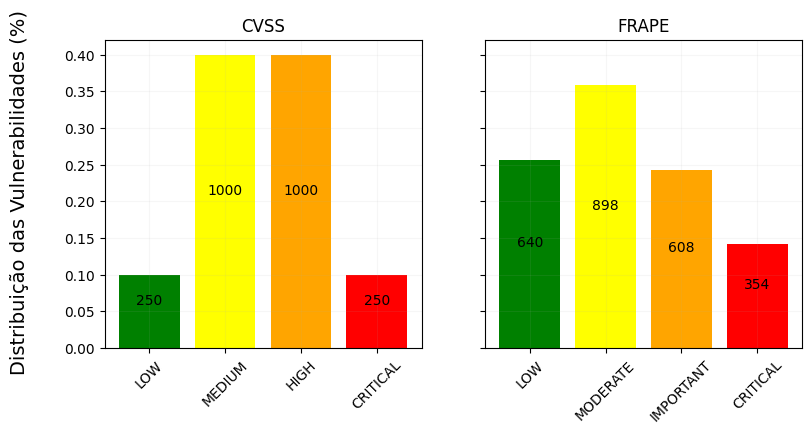

In [6]:
vulns_per_severity()

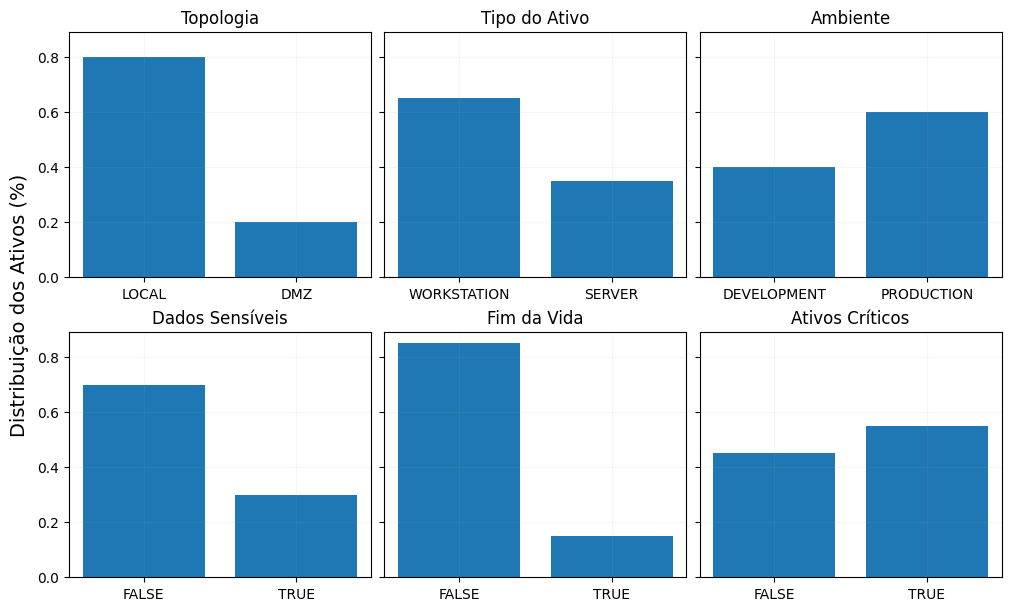

In [7]:
assets_per_context(context)